In [1]:
# Importing mnist dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
y = y.astype(int)

In [4]:
# 784 features = 28 x 28 pixels
X.shape

(70000, 784)

In [5]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [6]:
y.shape

(70000,)

In [7]:
# Showing 1 image from dataset
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

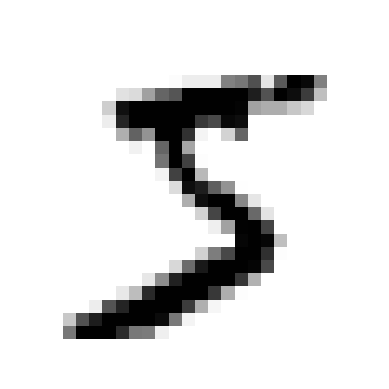

5


In [8]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()
print(y[0])

# Splitting the data to train and test 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
# Using Stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=13)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=13)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures
- Measuring Accuracy Using Cross-Validation
- Stratified k-fold
- Confusion Matrices

Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96850056, 0.94632239, 0.96426658])

Stratified k-fold

In [14]:
# StratifiedKFold with 3 splits
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # Clone the classifier to ensure a fresh instance for each fold
    clone_clf = clone(sgd_clf)
    
    # Split data into training and testing for this fold
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    # Train the cloned classifier on the training data for this fold
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # Make predictions on the test data for this fold
    y_pred = clone_clf.predict(X_test_fold)
    
    # Calculate the number of correct predictions
    n_correct = sum(y_pred == y_test_fold)
    
    # Print the accuracy for this fold
    print(n_correct / len(y_pred))

0.9685005624899555
0.9463223871002303
0.9642665809493196


Dummy classifier

In [15]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [16]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91005518, 0.91005518, 0.91005036])

## Confusion Matrices

In [17]:
# Making sets of predictions for confusion matrix with cross_val_predict
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[49732,  1231],
       [ 1026,  4011]], dtype=int64)

In [19]:
# the first row (the negative class) - non-5 images: 49732 correct (true negatives), 1231 wrong (false positives/ type 1 error)
# the second row (the positive class) - images of 5: 1026 wrong (false negatives/ type 2 error), 4011 correct (true positives) 

In [20]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[50963,     0],
       [    0,  5037]], dtype=int64)

## Precision and Recall

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7651659671880962

In [23]:
recall_score(y_train_5, y_train_pred)

0.7963073257891602

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7804261114894445

## The precision/recall trade-off